In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision
from torch.utils.data import DataLoader

In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 100
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


subset_indices = list(range(len(testset)))
subset_testset = Subset(testset, subset_indices)
testloader = DataLoader(subset_testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

100%|██████████| 170498071/170498071 [00:04<00:00, 35342239.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import time
from tqdm import tqdm

def train_model(model, criterion, optimizer, dataloaders, device, num_epochs=25):
    since = time.time()

    for epoch in range(num_epochs):
        print(f'Starting epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            torch.save(model.state_dict(), f'./checkpoints/model_epoch_{epoch}.pth')

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    return model

In [6]:
import os
os.mkdir('checkpoints')

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torchvision.models.resnet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

dataloaders = {'train': trainloader, 'val': testloader}

model = train_model(model, criterion, optimizer, dataloaders, device)

Starting epoch 0/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.08it/s]


train Loss: 1.5726 Acc: 0.4409


100%|██████████| 100/100 [00:01<00:00, 59.33it/s]


val Loss: 1.3014 Acc: 0.5398
Starting epoch 1/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.00it/s]


train Loss: 1.1670 Acc: 0.5838


100%|██████████| 100/100 [00:01<00:00, 54.70it/s]


val Loss: 1.0373 Acc: 0.6371
Starting epoch 2/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.53it/s]


train Loss: 1.0053 Acc: 0.6457


100%|██████████| 100/100 [00:01<00:00, 60.64it/s]


val Loss: 0.9270 Acc: 0.6770
Starting epoch 3/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.57it/s]


train Loss: 0.9069 Acc: 0.6837


100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


val Loss: 0.8678 Acc: 0.6980
Starting epoch 4/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.45it/s]


train Loss: 0.8350 Acc: 0.7087


100%|██████████| 100/100 [00:01<00:00, 58.47it/s]


val Loss: 0.8918 Acc: 0.6959
Starting epoch 5/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.74it/s]


train Loss: 0.7744 Acc: 0.7309


100%|██████████| 100/100 [00:01<00:00, 59.72it/s]


val Loss: 0.7245 Acc: 0.7510
Starting epoch 6/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.80it/s]


train Loss: 0.7292 Acc: 0.7451


100%|██████████| 100/100 [00:01<00:00, 58.67it/s]


val Loss: 0.6903 Acc: 0.7601
Starting epoch 7/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.01it/s]


train Loss: 0.6934 Acc: 0.7590


100%|██████████| 100/100 [00:01<00:00, 56.79it/s]


val Loss: 0.7046 Acc: 0.7607
Starting epoch 8/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.37it/s]


train Loss: 0.6543 Acc: 0.7708


100%|██████████| 100/100 [00:01<00:00, 56.68it/s]


val Loss: 0.6699 Acc: 0.7687
Starting epoch 9/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.53it/s]


train Loss: 0.6329 Acc: 0.7792


100%|██████████| 100/100 [00:01<00:00, 59.15it/s]


val Loss: 0.6670 Acc: 0.7708
Starting epoch 10/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.19it/s]


train Loss: 0.6045 Acc: 0.7900


100%|██████████| 100/100 [00:01<00:00, 58.60it/s]


val Loss: 0.6487 Acc: 0.7812
Starting epoch 11/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.93it/s]


train Loss: 0.5820 Acc: 0.7969


100%|██████████| 100/100 [00:01<00:00, 55.87it/s]


val Loss: 0.6072 Acc: 0.7925
Starting epoch 12/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.36it/s]


train Loss: 0.5526 Acc: 0.8080


100%|██████████| 100/100 [00:01<00:00, 55.89it/s]


val Loss: 0.6025 Acc: 0.7923
Starting epoch 13/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.42it/s]


train Loss: 0.5377 Acc: 0.8149


100%|██████████| 100/100 [00:01<00:00, 56.28it/s]


val Loss: 0.5968 Acc: 0.7991
Starting epoch 14/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.12it/s]


train Loss: 0.5131 Acc: 0.8225


100%|██████████| 100/100 [00:01<00:00, 59.86it/s]


val Loss: 0.5745 Acc: 0.8059
Starting epoch 15/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.25it/s]


train Loss: 0.5029 Acc: 0.8248


100%|██████████| 100/100 [00:01<00:00, 53.71it/s]


val Loss: 0.6003 Acc: 0.8029
Starting epoch 16/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.86it/s]


train Loss: 0.4881 Acc: 0.8302


100%|██████████| 100/100 [00:01<00:00, 58.08it/s]


val Loss: 0.5819 Acc: 0.8048
Starting epoch 17/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.26it/s]


train Loss: 0.4766 Acc: 0.8346


100%|██████████| 100/100 [00:01<00:00, 58.27it/s]


val Loss: 0.5796 Acc: 0.8070
Starting epoch 18/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.94it/s]


train Loss: 0.4630 Acc: 0.8392


100%|██████████| 100/100 [00:01<00:00, 58.85it/s]


val Loss: 0.5414 Acc: 0.8185
Starting epoch 19/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.23it/s]


train Loss: 0.4410 Acc: 0.8464


100%|██████████| 100/100 [00:01<00:00, 55.41it/s]


val Loss: 0.5653 Acc: 0.8118
Starting epoch 20/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.92it/s]


train Loss: 0.4416 Acc: 0.8469


100%|██████████| 100/100 [00:01<00:00, 59.23it/s]


val Loss: 0.5711 Acc: 0.8126
Starting epoch 21/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.10it/s]


train Loss: 0.4207 Acc: 0.8528


100%|██████████| 100/100 [00:01<00:00, 56.95it/s]


val Loss: 0.5544 Acc: 0.8196
Starting epoch 22/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.98it/s]


train Loss: 0.4096 Acc: 0.8570


100%|██████████| 100/100 [00:01<00:00, 60.50it/s]


val Loss: 0.5375 Acc: 0.8274
Starting epoch 23/24
----------


100%|██████████| 500/500 [00:15<00:00, 31.91it/s]


train Loss: 0.4059 Acc: 0.8582


100%|██████████| 100/100 [00:01<00:00, 54.97it/s]


val Loss: 0.5301 Acc: 0.8241
Starting epoch 24/24
----------


100%|██████████| 500/500 [00:15<00:00, 32.18it/s]


train Loss: 0.4008 Acc: 0.8603


100%|██████████| 100/100 [00:01<00:00, 55.58it/s]


val Loss: 0.5296 Acc: 0.8261
Training complete in 7m 18s


In [10]:
def calculate_savg(model, loader, device='cpu', models_path='./checkpoints/', models_amount=25, k=0.05):
    weights = torch.tensor([1 - (i / (models_amount - 1))**k for i in range(0, models_amount)])
    answers_for_all_models = []
    
    for i in range(models_amount):
        model.load_state_dict(torch.load(f'{models_path}model_epoch_{i}.pth'))
        model = model.to(device)
        model.eval()
        intermediate_results = []
        # Predict with all models
        for data in loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            intermediate_results.extend(predicted)
        print(i)
        answers_for_all_models.append(intermediate_results)
        
    answers_for_all_models = torch.tensor(answers_for_all_models)
    answer_final = answers_for_all_models[-1, :]

    A = torch.zeros_like(answers_for_all_models)
    
    for i in range(answers_for_all_models.size(1)):
        A[:, i] = (answers_for_all_models[:, i] != answer_final[i])
    weighted_sums = A.T.float() @ weights
    normalizing_divisors = A.float().sum(dim=0)
    result = torch.full_like(weighted_sums, fill_value=float(1))

    mask = (normalizing_divisors != 0)
    result[mask] = weighted_sums[mask] / normalizing_divisors[mask]
    return result

In [11]:
accepting_values = calculate_savg(torchvision.models.resnet18().to(device), testloader)
accepting_values = accepting_values.sort()

/tmp/ipykernel_36/1586528627.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{models_path}model_epoch_{i}.pth'))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


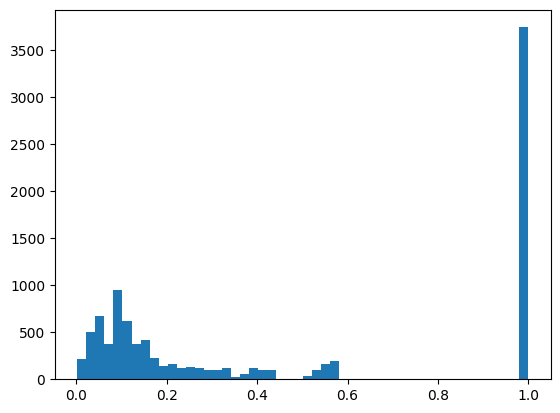

In [12]:
from matplotlib import pyplot as plt
plt.hist(accepting_values[0], bins=50)
plt.show()

In [33]:
def analyse_rejected(loader, accepting_values, model, PERSENT_TO_REJECT = 5):
    num_rejected = PERSENT_TO_REJECT * len(loader.dataset) // 100
    indices = accepting_values[1][:num_rejected]
    rejected_elements = Subset(loader.dataset, indices=indices)
    rejected_loader = DataLoader(rejected_elements, batch_size=BATCH_SIZE, shuffle=False)
    model = model.to(device)
    
    accuracy_on_rejected = 0.0
    for data in rejected_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.to(device)
        accuracy_on_rejected += sum(predicted == labels)
        print(sum(predicted == labels))

    accuracy_on_rejected /= len(rejected_loader.dataset)
    print(f"Persantage of succesfully predicted labels on rejected images {accuracy_on_rejected.item() * 100}%")
    return accuracy_on_rejected.item() * 100

In [34]:
final_model = torchvision.models.resnet18().to(device)
final_model.eval()

final_model.load_state_dict(torch.load('./checkpoints/model_epoch_24.pth'))

/tmp/ipykernel_36/2225406956.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  final_model.load_state_dict(torch.load('./checkpoints/model_epoch_24.pth'))


<All keys matched successfully>

In [40]:
def model_accuracy(model, loader):
    accuracy = 0.0
    for data in loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        accuracy += sum(predicted == labels)

    accuracy /= len(loader.dataset)
    print(f"Persantage of succesfully predicted labels on whole images {accuracy.item() * 100}%")
    return accuracy.item() * 100

In [43]:
def get_incorrectly_classified(model, loader):
    y = []
    for data in loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y.extend(predicted != labels)
    return y

In [44]:
sorted_elements = Subset(testloader.dataset, accepting_values[1])
sorted_loader = DataLoader(sorted_elements, batch_size=BATCH_SIZE, shuffle=False)

In [45]:
accuracy_rejected = analyse_rejected(testloader, accepting_values, final_model)

tensor(85, device='cuda:0')
tensor(74, device='cuda:0')
tensor(74, device='cuda:0')
tensor(66, device='cuda:0')
tensor(63, device='cuda:0')
Persantage of succesfully predicted labels on rejected images 72.40000367164612%


In [46]:
accuracy_whole = model_accuracy(final_model, testloader)

Persantage of succesfully predicted labels on whole images 82.60999917984009%


In [47]:
y = get_incorrectly_classified(final_model, sorted_loader)

# ATTACK

Проведена fgsm атака лишь на последнюю модель в наборе.

In [60]:
def create_perturbed_dataloader(model, original_dataloader, device, epsilon=0.03):
    perturbed_images = []
    perturbed_labels = []
    original_batch_size = original_dataloader.batch_size
    model = model.to(device)
    for images, labels in original_dataloader:
        
        images = images.to(device)
        labels = labels.to(device)
        images.requires_grad = True
        model.eval()
        
        output = model(images)
        _, pred = torch.max(output, 1)
        loss = torch.nn.functional.cross_entropy(output, pred)
        loss.backward()
        
        perturbed_batch = images + epsilon * images.grad.sign()
        
        perturbed_images.extend(perturbed_batch.detach().cpu().numpy())
        perturbed_labels.extend(labels)
    
    perturbed_dataloader = DataLoader(list(zip(perturbed_images, perturbed_labels)), batch_size=original_batch_size, shuffle=False)
    
    return perturbed_dataloader

In [61]:
perturbed = create_perturbed_dataloader(final_model, testloader, device)

In [62]:
accepting_values_attacked = calculate_savg(torchvision.models.resnet18().to(device), perturbed)
accepting_values_attacked = accepting_values_attacked.sort()

/tmp/ipykernel_36/1586528627.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{models_path}model_epoch_{i}.pth'))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [63]:
sorted_elements_attacked = Subset(perturbed.dataset, accepting_values_attacked[1])
sorted_loader_attacked = DataLoader(sorted_elements_attacked, batch_size=BATCH_SIZE, shuffle=False)

In [64]:
accuracy_rejected_attacked = analyse_rejected(perturbed, accepting_values_attacked, final_model, 5)

tensor(74, device='cuda:0')
tensor(78, device='cuda:0')
tensor(66, device='cuda:0')
tensor(65, device='cuda:0')
tensor(53, device='cuda:0')
Persantage of succesfully predicted labels on rejected images 67.20000505447388%


In [65]:
accuracy_whole_attacked = model_accuracy(final_model, perturbed)

Persantage of succesfully predicted labels on whole images 30.410000681877136%


In [66]:
y_attacked = get_incorrectly_classified(final_model, sorted_loader_attacked)

Ниже видно, что до атаки было существенно больше точек, которые надёжно классифицировались (было не больше одного расхождения с финальной моделью). Однако есть и хорошие закономерности. Количество неправильно классифицируемых картинок при уверенности близкой к единице не увеличивается. То есть большая часть неправильно классифицируемых картинок после fgsm атаки попадает в левый хвост.

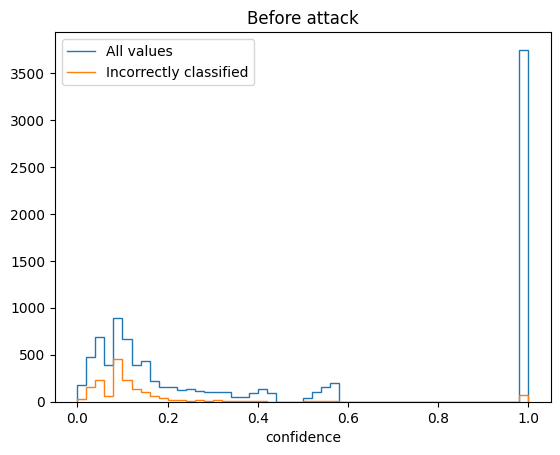

In [67]:
counts1, bins1 = np.histogram(accepting_values[0], bins=50, range=(0, 1))
counts2, bins2 = np.histogram(accepting_values[0][y], bins=50, range=(0, 1))

plt.stairs(counts1, bins1, label='All values')
plt.stairs(counts2, bins2, label='Incorrectly classified')
plt.title('Before attack')
plt.xlabel('confidence')
plt.legend()
plt.show()

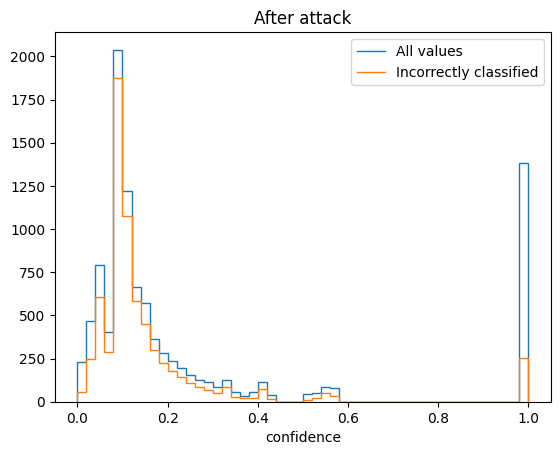

In [68]:
counts1, bins1 = np.histogram(accepting_values_attacked[0], bins=50, range=(0, 1))
counts2, bins2 = np.histogram(accepting_values_attacked[0][y_attacked], bins=50, range=(0, 1))

plt.stairs(counts1, bins1, label='All values')
plt.stairs(counts2, bins2, label='Incorrectly classified')
plt.title('After attack')
plt.xlabel('confidence')
plt.legend()
plt.show()

Введём метрику для selective classifier'а - $goodness = \frac{acc_{total}}{acc_{rejected}}$ (Больше - лучше). 

Свойства
* $goodness = 1 \iff $ selective classifier не работает (совсем) 
* $goodness = \infty \iff$ selective classifier работает великолепно

Как видим, отношение уменьшилось в 1.78 раз, что демонстрирует эффективность атаки.

In [69]:
print(f'Goodness before attack: {accuracy_whole / accuracy_rejected}')
print(f'Goodness after attack: {accuracy_whole_attacked / accuracy_rejected_attacked}')

Goodness before attack: 1.1410220302542953
Goodness after attack: 0.4525297380145446


# Как довести goodness до единицы?

Можно попробовать прибавлять к картинке её градиент в различных моделях пропорционально весам моделей.

$img_{per} = img + \epsilon{\sum_{i=0}^{M}{w_i * \nabla_{img}{model_i}}}$


$M$ - количество моделей

$w_i = 1 - (i / (M - 1))^k$